## REGRESSION ##

- Regression is included on time series data

In [ ]:
import pandas as pd
diabetes_df = pd.read_csv("diabete.csv")
print(diabetes_df.head())

In [ ]:
# Creating feature and target arrays
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

# Making predictions from a single feature
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)
# These are both one dimensional arrays
# Features must be in the form of two dimensional arrays to be accepted by scikit learn
X_bmi = X_bmi.reshape(-1, 1)
print(y.shape, X_bmi.shape)
# Plotting Glucose vs BMI
import matplotlib.pyplot as plot
plt.xlabel("Blood Glucose")
plt.ylabel("BMI")
plt.show()

# FITTING A LINEAR REGRESSION MODEL TO THE DATA
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.xlabel("Blood Glucose")
plt.ylabel("BMI")
plt.show()


### Linear Regression

- Eq of line: y = ax + b
- simple linear regression uses one feature:
  - y = target
  - x = single feature
  - a,b = parameters/coefficients of the model = slope/intercept

#### Loss Function
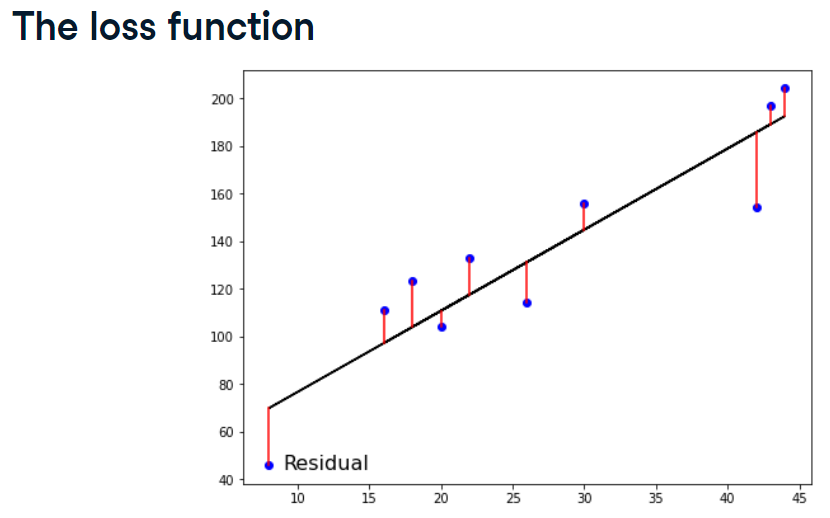

1) Ordinary Least Squares:
- calculated using Residual Sum of Squares(RSS)
- OLS tries to minimise RSS

HIGHER DIMENSIONS

y = a1x1 + a2x2 + b
- When more features are added, it is known as multiple regression
y = a1x1 + a2x2 + a3x3 + .... anxn + b
- Linear Regression preforms OLS under the hood

2) R-Squared:
- R^2: Quantifies the variance in target values explained by features
- Values range from 0 to 1

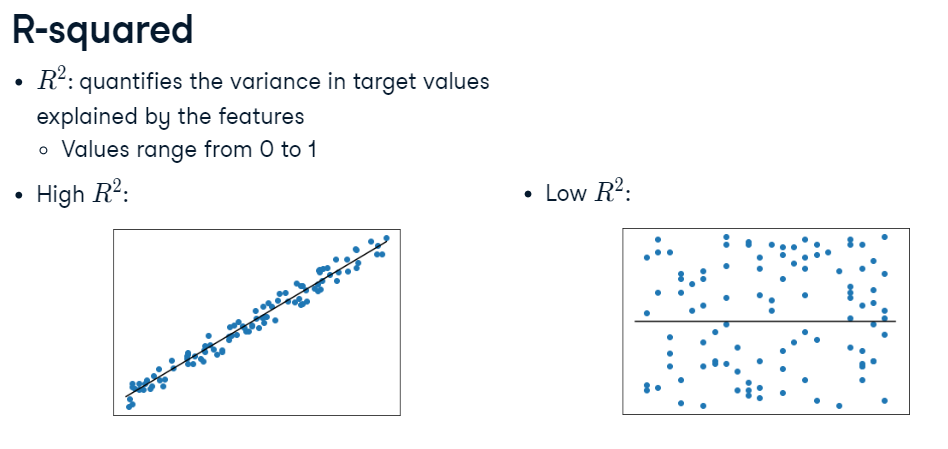

3) Mean Squared Error and Root Mean Squared Error:
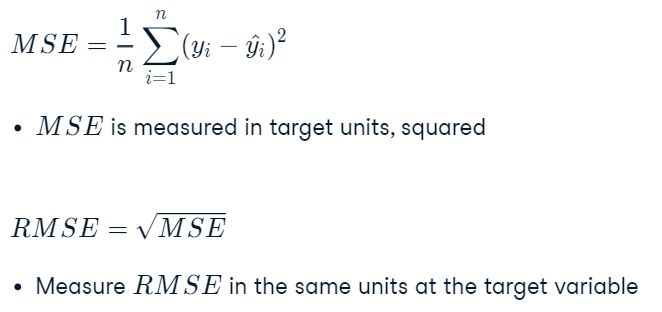


In [ ]:
# LINEAR REGRESSION USING ALL FEATURES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
# Linear Regression preforms OLS under the hood

# R-Squared
reg_all.score(X_test, y_test)

# RMSE 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred, squared = False)



### Cross Validation

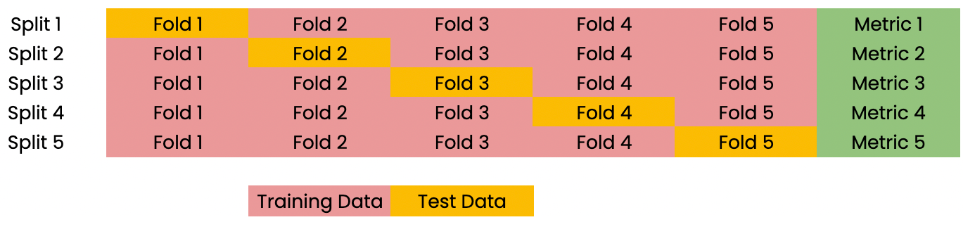

- k Folds = k Fold Cross Validation


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))